# 주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다. 이 때 적당한 숙박료를 구하시오. (5점)
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 New York City Airbnb Open Data를 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    AB_NYC_2019.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수

    
- 데이터 출처: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. Regression에 대하여

### 선형 회귀에 대하여

### 그 외의 회귀 방법


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kimhagdori'
os.environ['KAGGLE_KEY'] = '5f09cbd68873b51cb127ca6c2daa552d'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

# !kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
# !unzip '*.zip'

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = pd.read_csv('./AB_NYC_2019.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [6]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

# df.minimum_nights 최대값 1250일 의심스러워 확인 해봐야할 듯
# price min : 0 / max : 10000 이상 확인

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
## Not Answer 개수

df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
# 2019년 7월 8일 이전 데이터만 있는듯?
print('-----last_review-----\n',df.last_review.sort_values(ascending=False)[:100]) 

# 1달에 리뷰 몇개 달리는지 인듯
print('-----review_per_month-----\n', df.reviews_per_month.sort_values(ascending=False)[:100]) 

# 두 컬럼의 데이터가 똑같이 10052개인 것으로 봐서
# last_review가 없고 reveiws_per_month가 없는건 아직 한번도 예약을 받은 적이 없는 방들일수도있을듯

-----last_review-----
 48852    2019-07-08
42665    2019-07-08
44459    2019-07-08
44446    2019-07-08
44382    2019-07-08
            ...    
38437    2019-07-07
38438    2019-07-07
43284    2019-07-07
9574     2019-07-07
27734    2019-07-07
Name: last_review, Length: 100, dtype: object
-----review_per_month-----
 42075    58.50
42076    27.95
38870    20.94
27287    19.75
28651    17.82
         ...  
45961     9.78
32020     9.74
46260     9.73
41704     9.68
15549     9.67
Name: reviews_per_month, Length: 100, dtype: float64


In [11]:
# 10052개인 것 같음

((df['last_review'].isna()) & (df['reviews_per_month'].isna())).sum()

10052

In [12]:
# minumum_nights 확인해봐야할듯
df.loc[df.minimum_nights == df.minimum_nights.max(), :]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


In [13]:
df.loc[df.host_id == 367815, :]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1250,533625,Sunny 2 Bedroom Duplex with Garden,367815,Liz,Brooklyn,Bedford-Stuyvesant,40.69043,-73.95677,Entire home/apt,175,3,18,2018-10-08,0.35,2,0
3026,1778294,Sweet Apartment on Quiet Block,367815,Liz,Brooklyn,Bedford-Stuyvesant,40.68931,-73.95548,Entire home/apt,120,7,39,2019-06-22,0.91,2,50


In [14]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:>

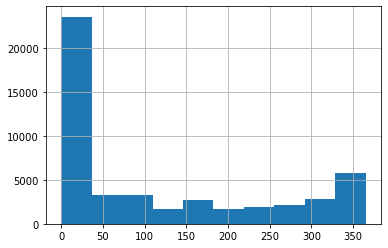

In [15]:
df['availability_365'].hist() # 0일 available한건 그냥 숫자를 넣지 않은것 같음!!

<AxesSubplot:ylabel='price'>

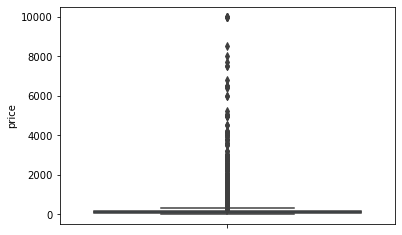

In [16]:
sns.boxplot(y='price', data=df)

In [17]:
# 비슷한 형태의 방의 평균을 대체하면 좋지않을까?

df.loc[df.price >= 6000, :].count() # 18개

id                                18
name                              18
host_id                           18
host_name                         18
neighbourhood_group               18
neighbourhood                     18
latitude                          18
longitude                         18
room_type                         18
price                             18
minimum_nights                    18
number_of_reviews                 18
last_review                        8
reviews_per_month                  8
calculated_host_listings_count    18
availability_365                  18
dtype: int64

In [18]:
## 0으로 들어간거 굉장히 많음 

df.loc[df.availability_365 == 0, :]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,NaN,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0


In [19]:
df.drop(['id', 'name', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)

### 문제 5. 수치형 데이터와 Price의 Jointplot 분석하기


In [20]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [21]:
sns.set(rc = {'figure.figsize' : (20, 12)})

def jointplots(xcols, ycols, df, kind='scatter'):
    sns.jointplot(x=xcols, y=ycols, data=df, kind=kind)

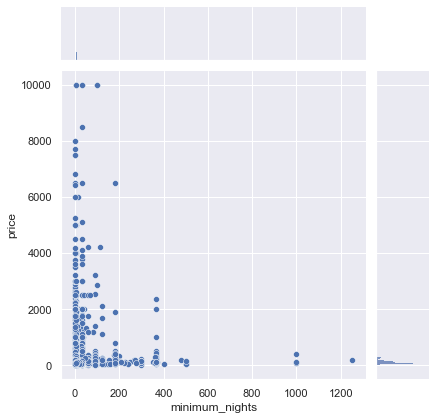

In [22]:
jointplots(xcols='minimum_nights', ycols='price', df=df)

# 최소 숙박일수가 많은건 이상한것 같은데, 숙박일수 높으면 가격이 저렴

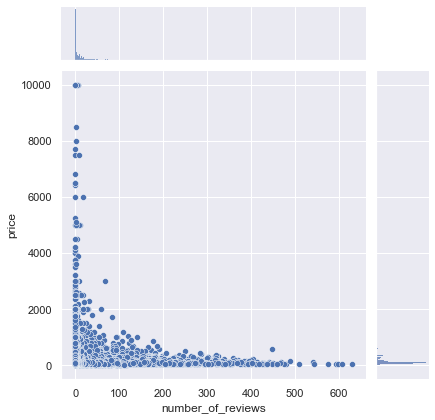

In [23]:
jointplots(xcols='number_of_reviews', ycols='price', df=df)

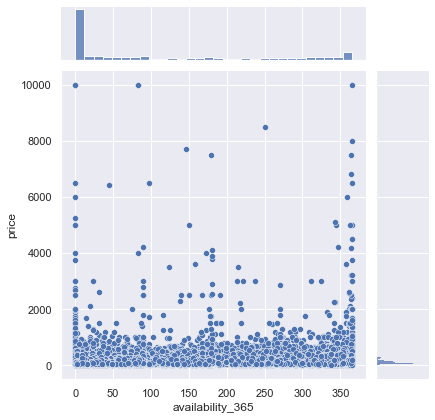

In [24]:
jointplots(xcols='availability_365', ycols='price', df=df)

(0.0, 1500.0)

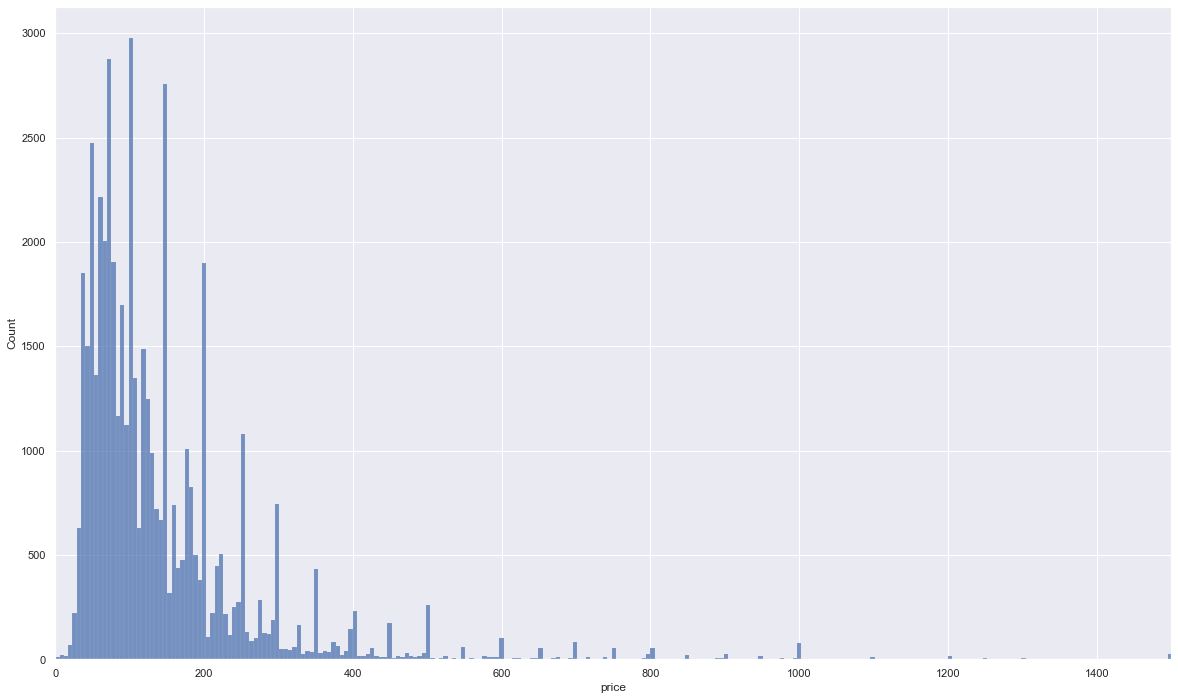

In [25]:
sns.histplot(x='price', data=df)
plt.xlim(0, 1500)
# 가격 대부분 300$ 이하인듯

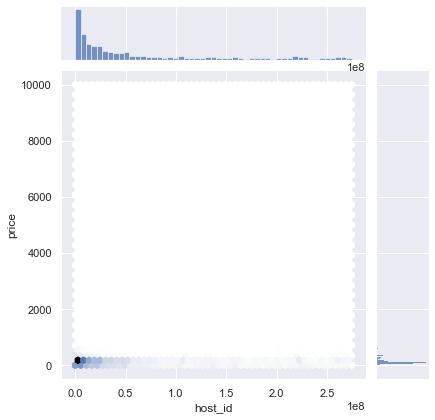

In [26]:
jointplots(xcols='host_id', ycols='price', df=df, kind='hex')

### 문제 6. 수치형 데이터와 Price의 상관성 분석하기

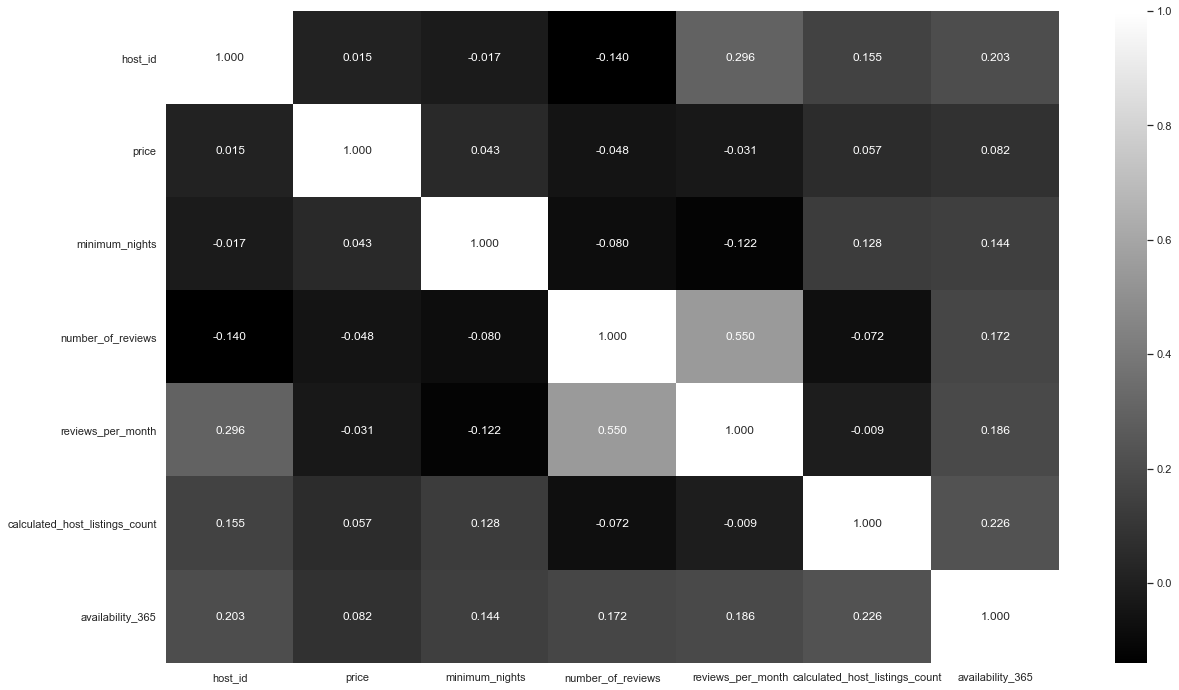

In [27]:
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='gray')
plt.show()

In [28]:
df.corr()['price'] # 영향을 크게 주는 건 없는듯

host_id                           0.015309
price                             1.000000
minimum_nights                    0.042799
number_of_reviews                -0.047954
reviews_per_month                -0.030608
calculated_host_listings_count    0.057472
availability_365                  0.081829
Name: price, dtype: float64

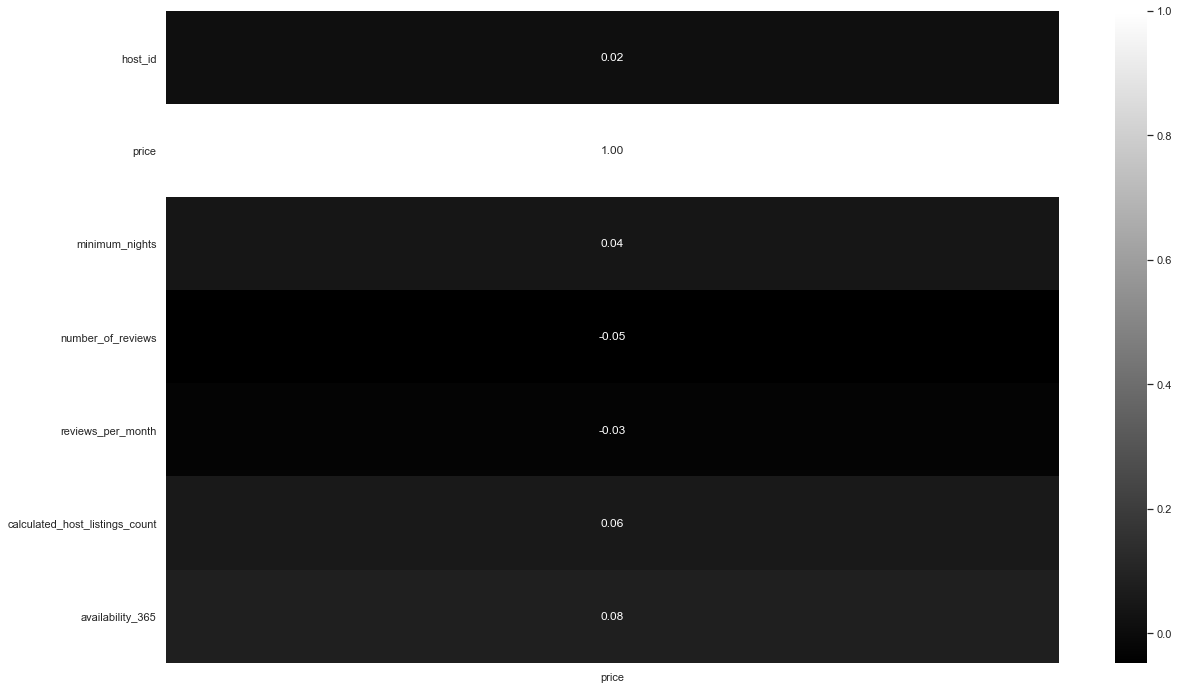

In [29]:
sns.heatmap(df.corr()[['price']], annot=True, fmt='.2f', cmap='gray')
plt.show()

### 문제 7. 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

In [30]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

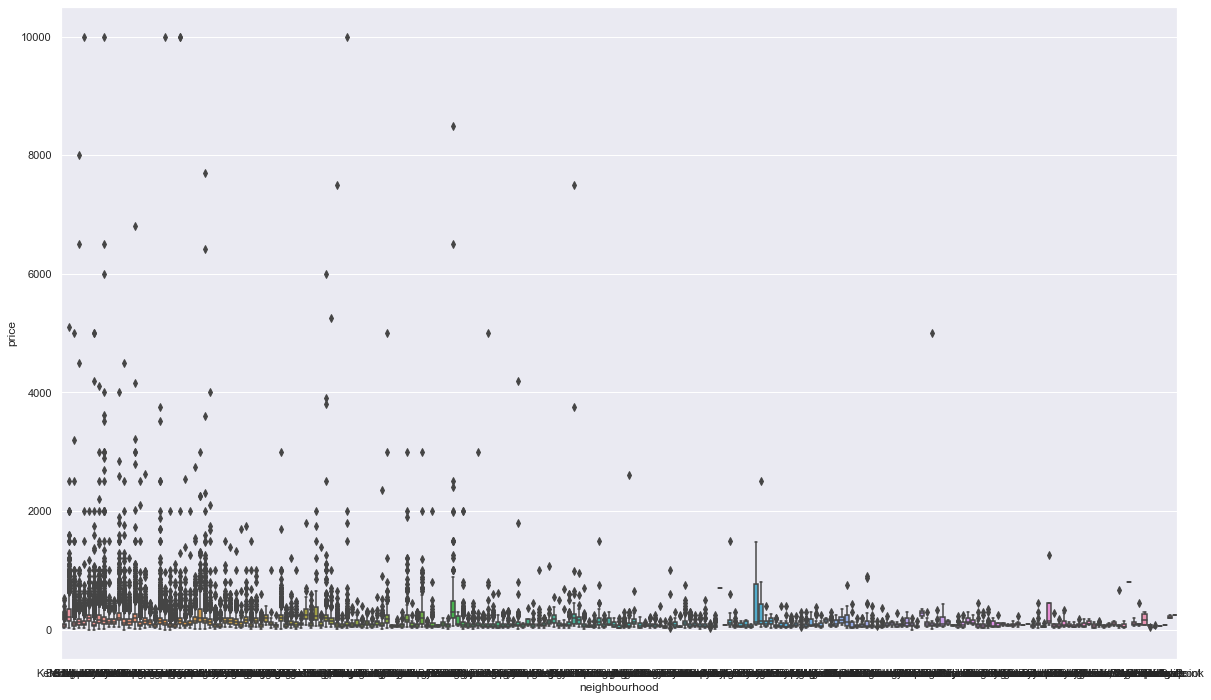

In [31]:
# 보기 애매하니까 상위 20개만 출력해봐지ㅏ
sns.boxplot(x='neighbourhood', y='price', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Midtown'),
  Text(1, 0, 'Harlem'),
  Text(2, 0, 'Clinton Hill'),
  Text(3, 0, 'East Harlem'),
  Text(4, 0, 'Bedford-Stuyvesant'),
  Text(5, 0, "Hell's Kitchen"),
  Text(6, 0, 'Upper West Side'),
  Text(7, 0, 'West Village'),
  Text(8, 0, 'Williamsburg'),
  Text(9, 0, 'Chelsea'),
  Text(10, 0, 'Crown Heights'),
  Text(11, 0, 'East Village'),
  Text(12, 0, 'Greenpoint'),
  Text(13, 0, 'Bushwick'),
  Text(14, 0, 'Flatbush'),
  Text(15, 0, 'Lower East Side'),
  Text(16, 0, 'Upper East Side'),
  Text(17, 0, 'Washington Heights'),
  Text(18, 0, 'Financial District'),
  Text(19, 0, 'Astoria')])

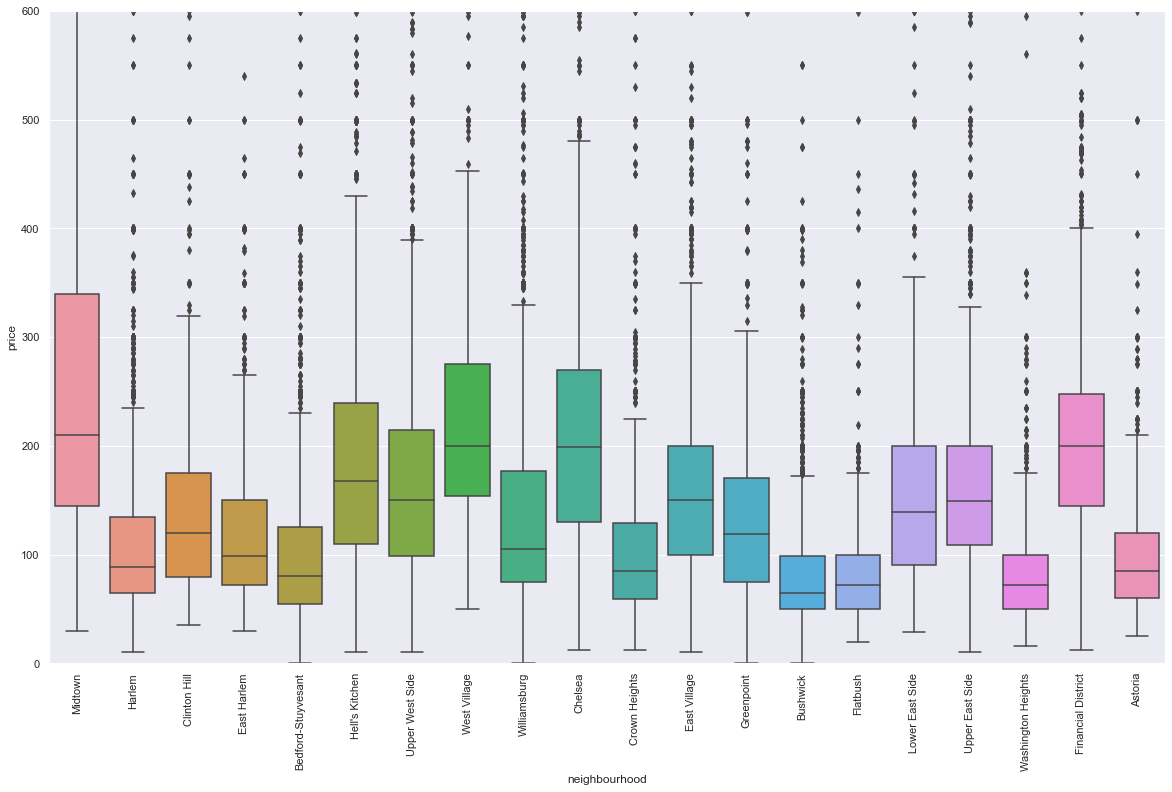

In [32]:
neighborsTop20 = df['neighbourhood'].value_counts()[:20].index.tolist()
neighborsTop20_df = df.loc[df['neighbourhood'].map(lambda x: True if str(x) in neighborsTop20 else False), :]


sns.boxplot(x='neighbourhood', y='price', data=neighborsTop20_df)
plt.ylim(0, 600)
plt.xticks(rotation=90)

# Midtown이 가장 많고 가장 비싼듯? (지역이 뭔지 몰라서 잘 모르겠네)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

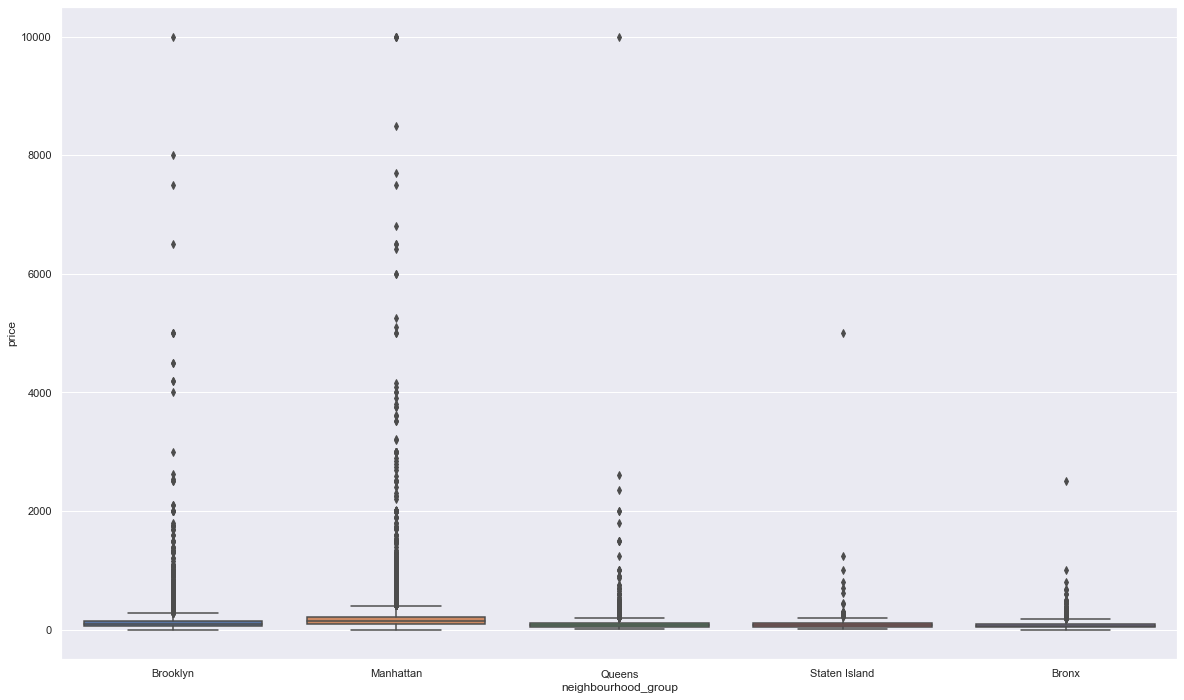

In [33]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)

<AxesSubplot:xlabel='room_type', ylabel='price'>

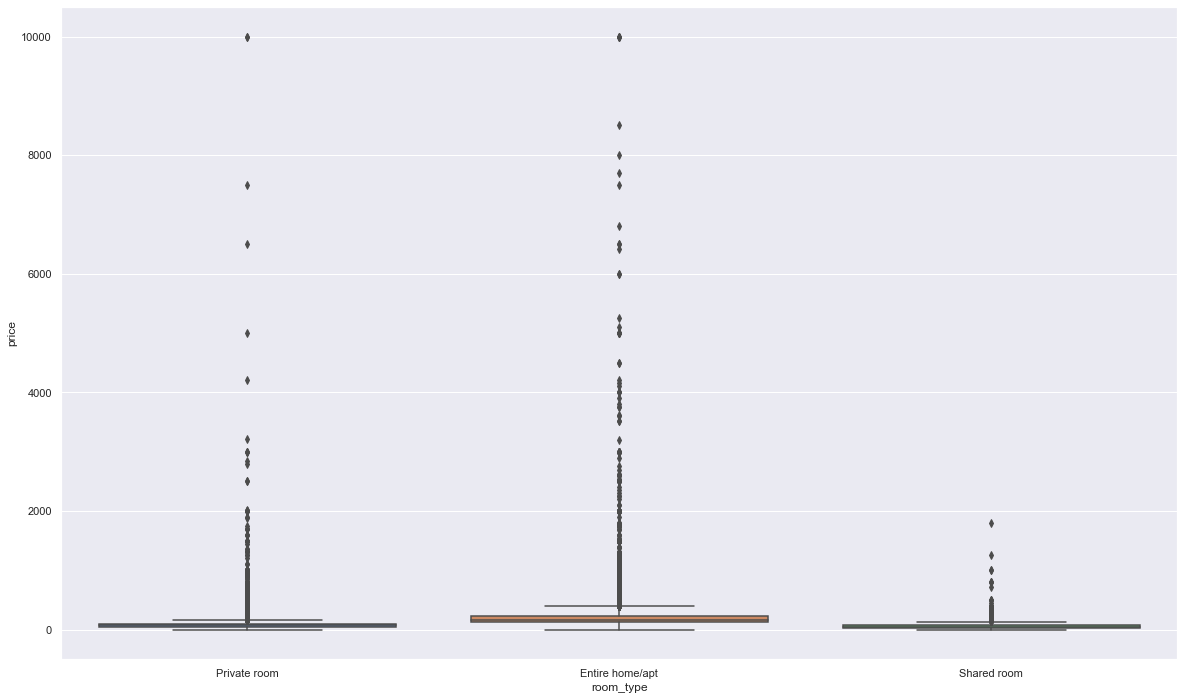

In [34]:
sns.boxplot(x='room_type', y='price', data=df)

    - price 아웃라이어 처리 필요해 보임!!

## Step 3. 데이터 클리닝 수행하기

### 문제 8. 미기입, 오기입 데이터 확인하기

In [35]:
# 각 컬럼을 분석하여 미기입/오기입된 데이터 확인하기
# Hint) 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인


df.isna().sum() # last_review & reviews_per_month 

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [37]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Rossville                1
Willowbrook              1
Richmondtown             1
New Dorp                 1
Name: neighbourhood, Length: 221, dtype: int64

In [38]:
df['room_type'].value_counts

<bound method IndexOpsMixin.value_counts of 0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object>

In [39]:
## 등록된 리뷰가 있으면 1 없으면 0

df['review_presence'] = df['reviews_per_month'].notna() & df['last_review'].notna()
df['review_presence'] = df['review_presence'].map(lambda x: 1 if x == True else 0)


## reviews_per_month : Na 값은 0.0으로 대체

df['reviews_per_month'] = df['reviews_per_month'].fillna('0.0')

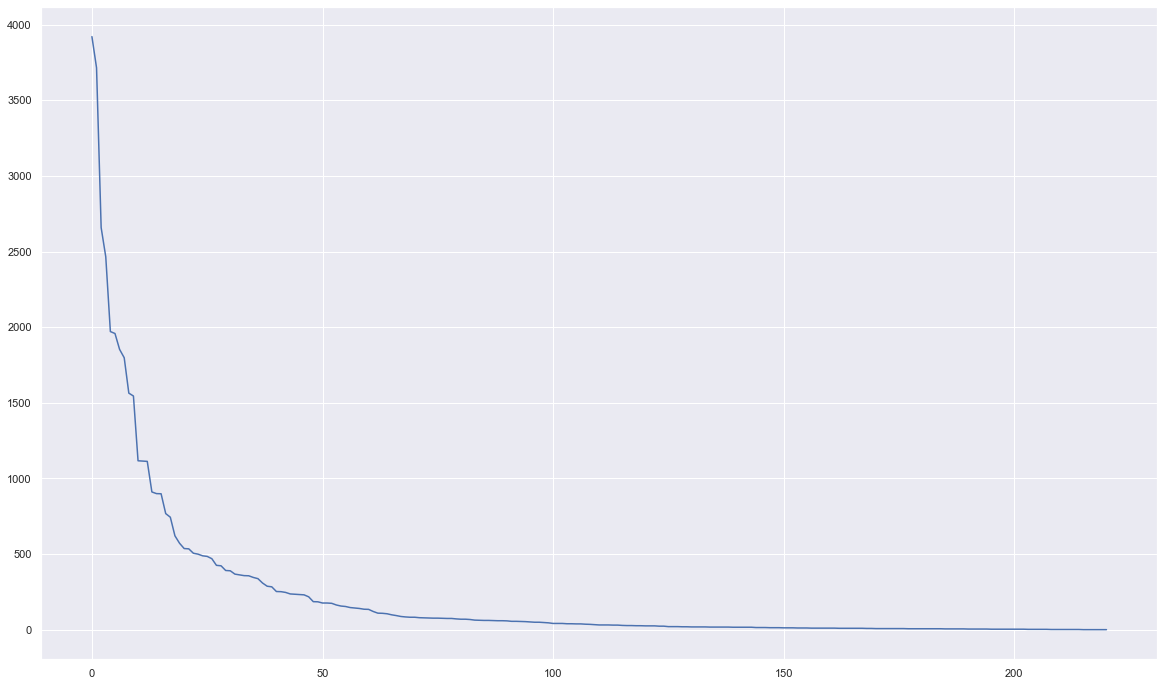

In [40]:
## neighbourhood 너무 많아서 상위 50개 밑으로는 Others로 묶기

neighbors = df['neighbourhood'].value_counts()

plt.plot(range(len(neighbors)), neighbors)

In [41]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda x: x if str(x) in neighbors[:50] else 'others')

df['neighbourhood'].value_counts()

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

### 문제 9. 아웃라이어를 제거하고 통계 재분석하기

<AxesSubplot:xlabel='price'>

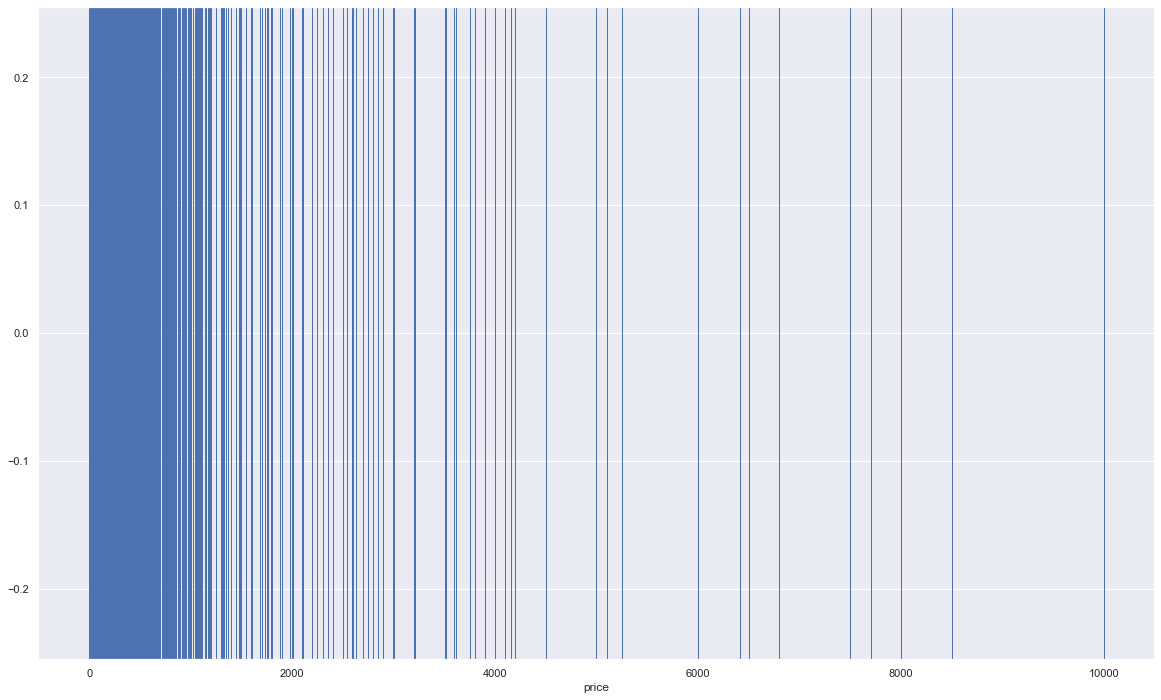

In [42]:
sns.rugplot(x='price', data=df, height=1)

In [43]:
print('상위 5%', df['price'].quantile(0.95)) 
print('하위 0.5%', df['price'].quantile(0.005)) 

상위 5% 355.0
하위 0.5% 26.0


<AxesSubplot:xlabel='minimum_nights'>

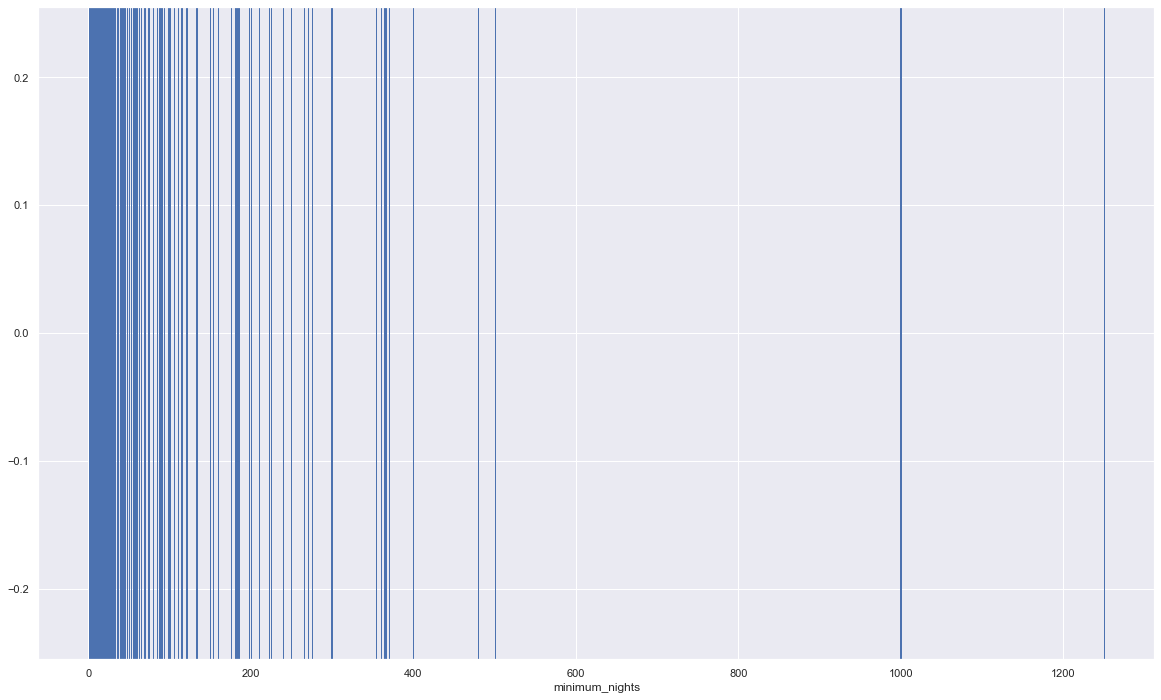

In [44]:
sns.rugplot(x='minimum_nights', data=df, height=1)

In [45]:
print('상위 2%', df['minimum_nights'].quantile(0.98)) 

상위 2% 30.0


<AxesSubplot:xlabel='availability_365'>

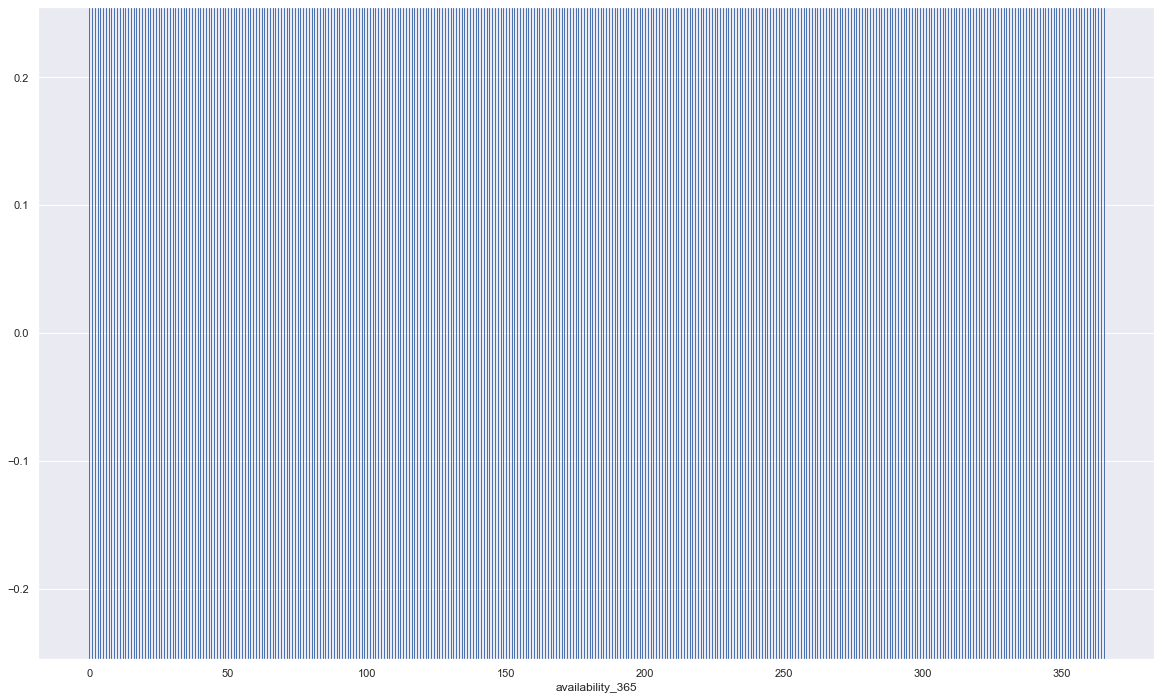

In [46]:
sns.rugplot(x='availability_365', data=df, height=1) # 0인게 많으므로 0인지 아닌지 나타내는 변수 하나 만들어

<AxesSubplot:>

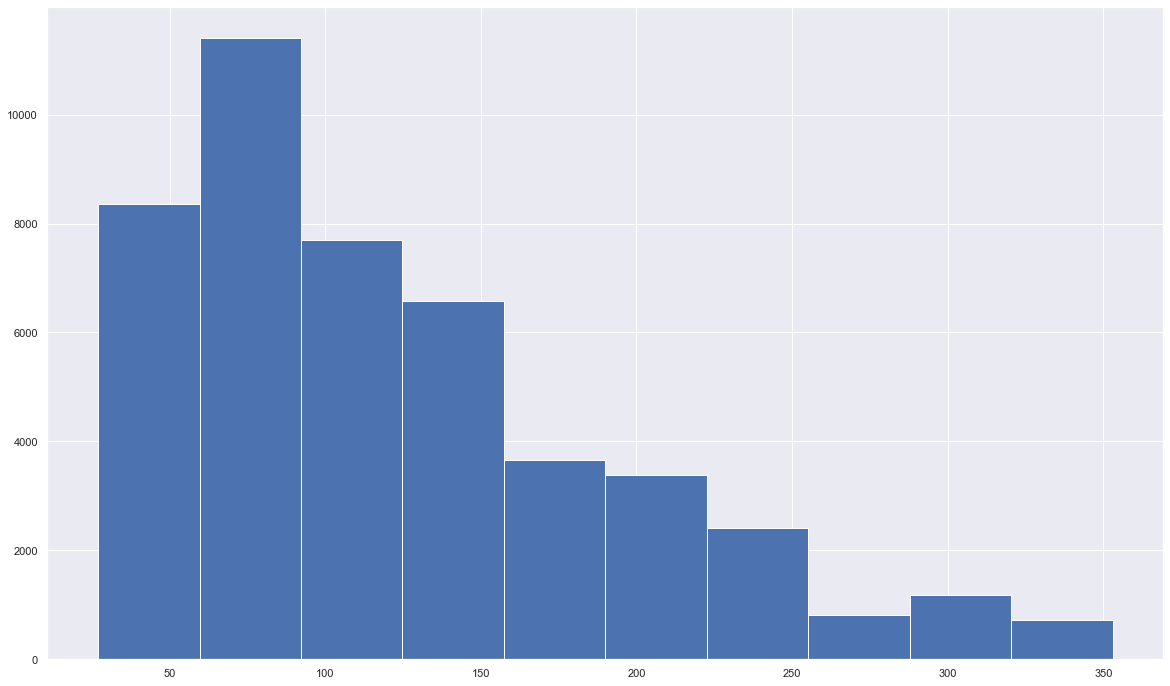

In [47]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기

p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
df = df[(df['price'] < p1) & (df['price'] > p2)]
df['price'].hist()

<AxesSubplot:>

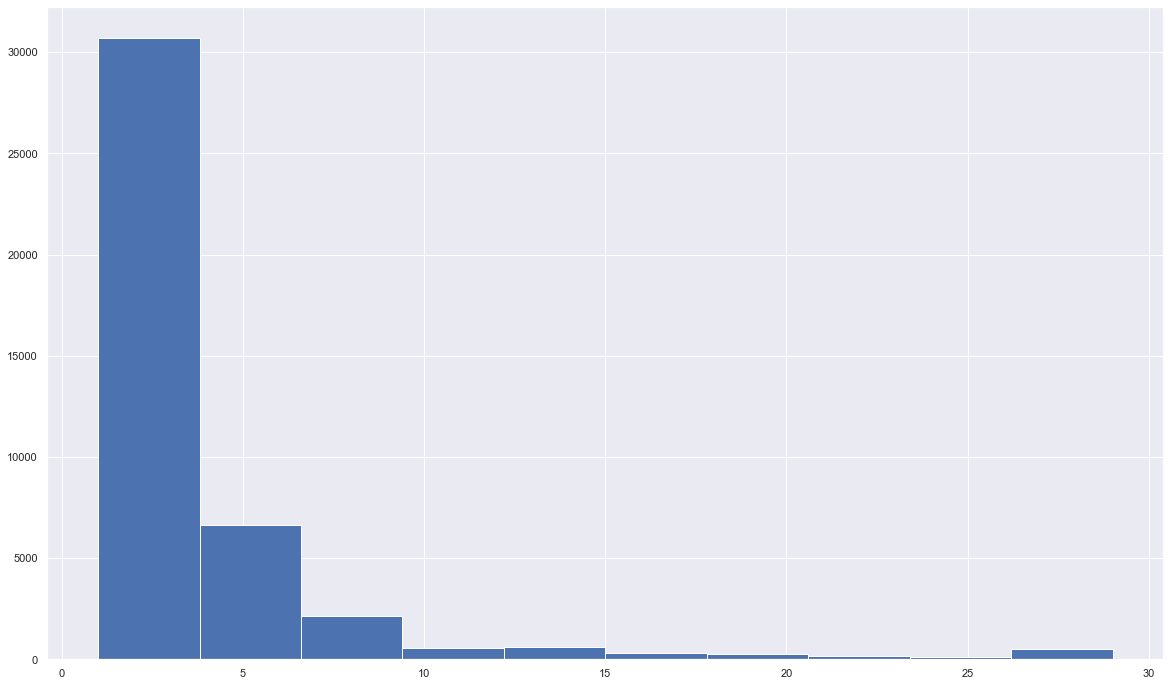

In [48]:
m1 = df['minimum_nights'].quantile(0.98) # 30
df = df[df.minimum_nights < m1]
df['minimum_nights'].hist()

In [52]:
df['is_avai_zero'] = df['availability_365'].map(lambda x: 'Zero' if x == 0 else 'Not-Zero')

### 문제 10. 미기입 데이터 처리하기

In [55]:
# fill(), dropna() 등으로 미기입된 데이터를 처리하기

df.isna().sum()

host_id                              0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7539
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
review_presence                      0
is_avai_zero                         0
dtype: int64

In [56]:
df.fillna(0, inplace=True) # last_review 0으로 처라해줘 last는 위에서 해줌

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41980 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   host_id                         41980 non-null  int64 
 1   neighbourhood_group             41980 non-null  object
 2   neighbourhood                   41980 non-null  object
 3   room_type                       41980 non-null  object
 4   price                           41980 non-null  int64 
 5   minimum_nights                  41980 non-null  int64 
 6   number_of_reviews               41980 non-null  int64 
 7   last_review                     41980 non-null  object
 8   reviews_per_month               41980 non-null  object
 9   calculated_host_listings_count  41980 non-null  int64 
 10  availability_365                41980 non-null  int64 
 11  review_presence                 41980 non-null  int64 
 12  is_avai_zero                    41980 non-null

In [76]:
df['is_avai_zero'].dtype == 'O'

True

In [99]:
cat_cols = []
num_cols = []
for col in df.columns:
    if (col == 'reviews_per_month') or (col == 'last_review'):
        continue
    elif df[col].dtype == 'O':
        cat_cols.append(col)
    else:
        num_cols.append(col)
        
        
print(cat_cols)
print(num_cols)

['neighbourhood_group', 'neighbourhood', 'room_type', 'is_avai_zero']
['host_id', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'review_presence']


In [100]:
X_cat = pd.get_dummies(df[cat_cols])
X_cat

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,...,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avai_zero_Not-Zero,is_avai_zero_Zero
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
48891,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
48892,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
48893,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
num_cols.remove('price')
num_cols.remove('review_presence')
print(num_cols)

['host_id', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']


In [103]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df[num_cols]

X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), index=X_num.index, columns=X_num.columns)

X = pd.concat([X_num_scaled, X_cat], axis=1)
X['review_presence'] = df['review_presence']
y = df['price']

display(X.head())

,host_id,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avai_zero_Not-Zero,is_avai_zero_Zero,review_presence
0,-0.848227,-0.588004,-0.352358,0.066069,2.132586,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,1
1,-0.848227,-0.588004,0.419649,-0.084134,2.052616,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
2,-0.848204,-0.119342,-0.545360,-0.121684,2.132586,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,-0.848200,-0.588004,5.244692,-0.121684,0.765095,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,-0.848170,1.520973,-0.352358,-0.121684,-0.786327,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1


### 문제 13. 학습데이터와 테스트데이터 분리하기


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
print(f'Shape of Train X \n{X_train.shape}')
print(f'Shape of Train y \n{y_train.shape}')

Shape of Train X 
(29386, 67)
Shape of Train y 
(29386,)


## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [107]:
from xgboost import XGBRegressor

In [111]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

model_reg.score(X_test, y_test)

0.5355961674842878

### 문제 15. 모델 학습 결과 평가하기

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [113]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)

print(f'Root_mean_squared_error : {np.sqrt(mean_squared_error(y_test, pred))}')
print(f'mean_absolute_error : {mean_absolute_error(y_test, pred)}')

Root_mean_squared_error : 47.89446488377767
mean_absolute_error : 34.2129457951425


## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


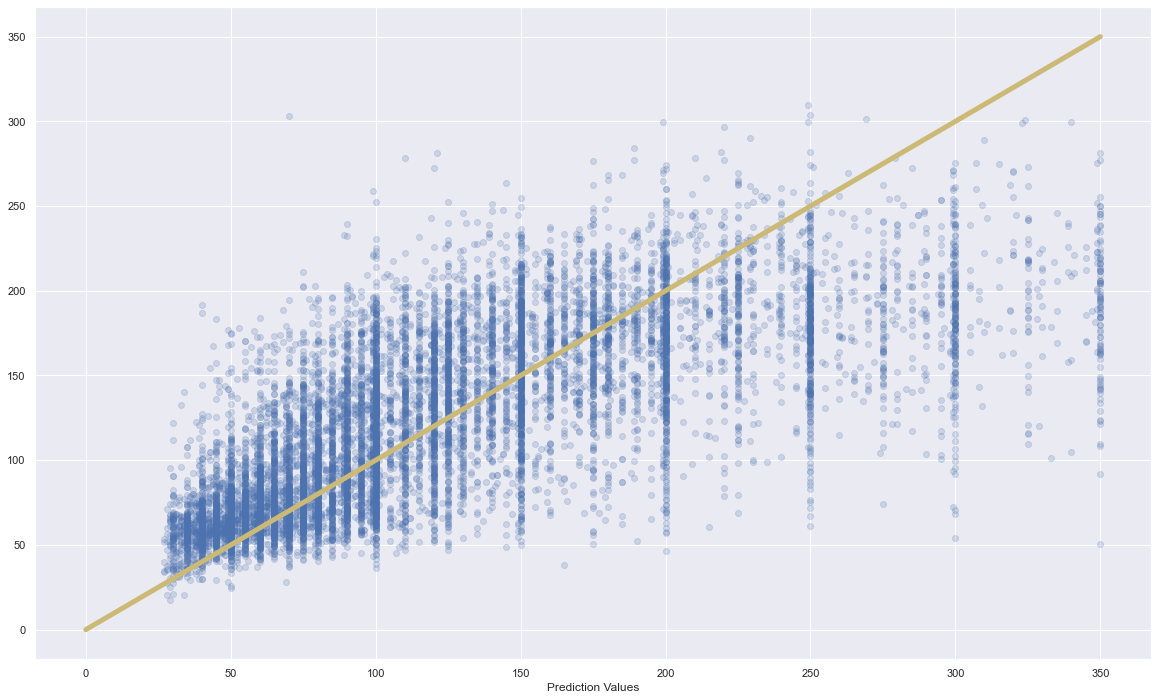

In [122]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기


plt.scatter(x=y_test, y=pred, alpha=0.2)
plt.plot([0, 350], [0, 350], 'y-', linewidth=5)
plt.xlabel('True Values')
plt.xlabel('Prediction Values')
plt.show()

### 문제 17. 에러 값의 히스토그램 확인하기


In [120]:
display(df['price'].describe())
print(f'Root_mean_squared_error : {np.sqrt(mean_squared_error(y_test, pred))}')

count    41980.000000
mean       121.572535
std         70.686288
min         27.000000
25%         67.000000
50%        100.000000
75%        159.000000
max        352.000000
Name: price, dtype: float64

Root_mean_squared_error : 47.89446488377767


<AxesSubplot:xlabel='price', ylabel='Count'>

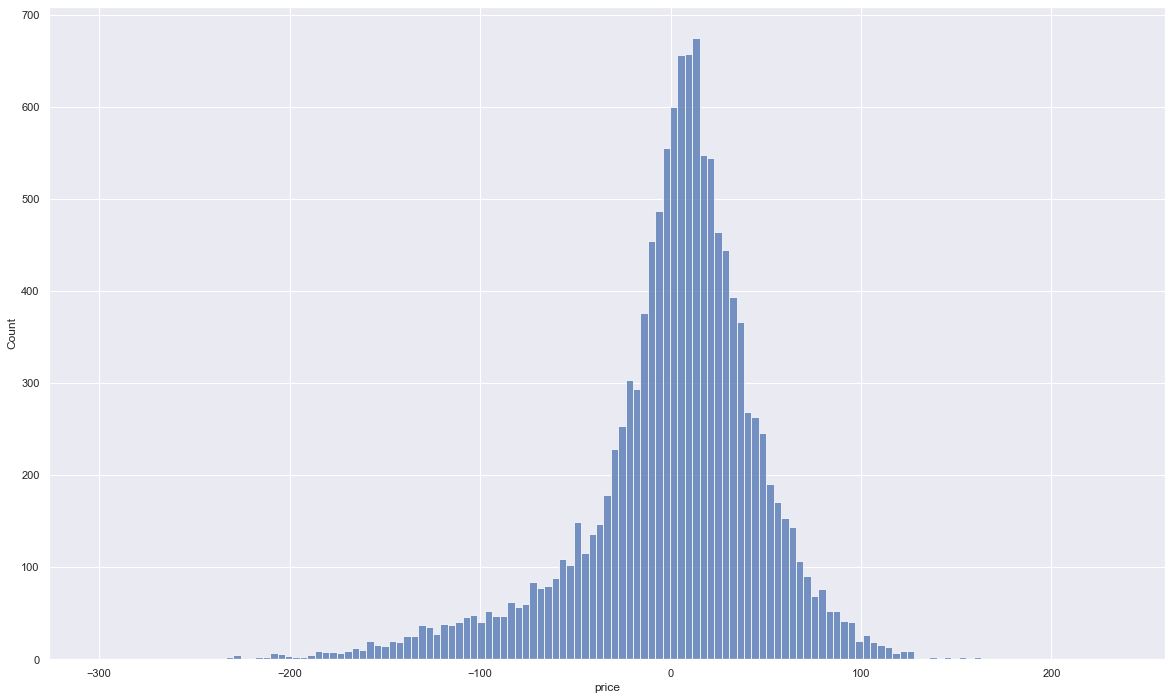

In [125]:
# err의 히스토그램으로 에러 히스토그램 확인하기
err = pred - y_test


sns.histplot(err)

<AxesSubplot:xlabel='price', ylabel='Count'>

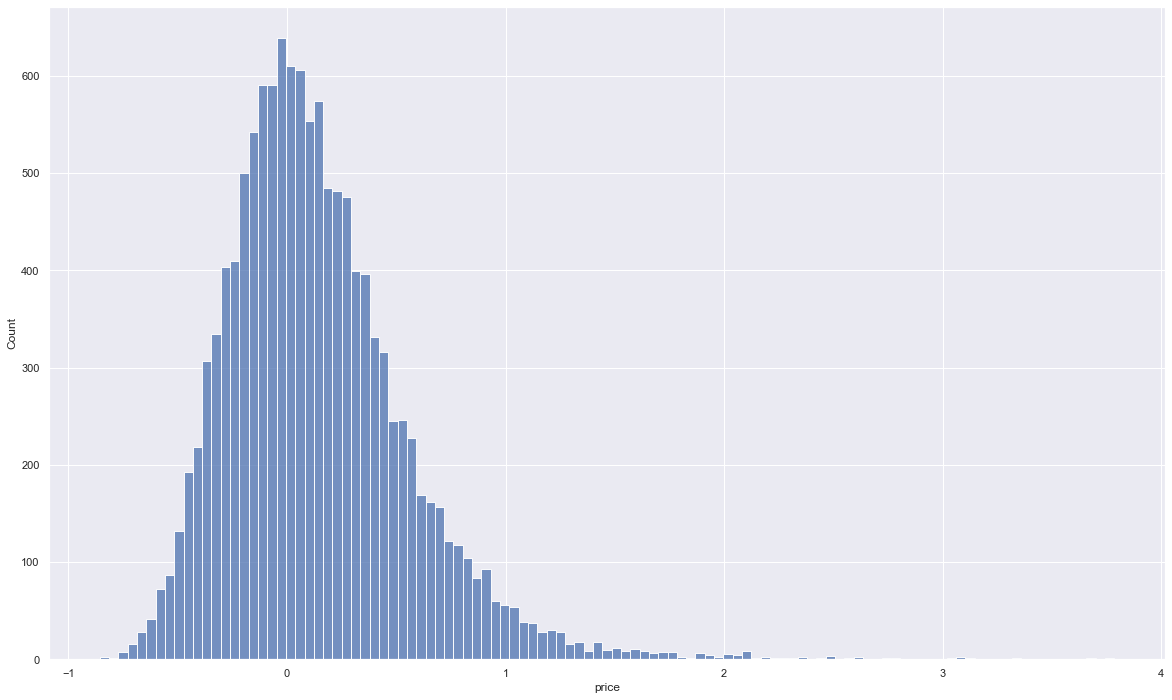

In [124]:
# err의 히스토그램으로 에러 히스토그램 확인하기
err = (pred - y_test) / y_test

sns.histplot(err)